In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm, skew
from scipy import stats

In [2]:
train=pd.read_csv('counterfeit_train.csv')

In [3]:
train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
import datetime
now = datetime.datetime.now()
print (now.year, now.month, now.day, now.hour, now.minute, now.second)

2017 12 28 2 0 28


In [5]:
train['active from c_d']= train['Active_Since'].apply(lambda x: now.year-x)

In [6]:
train['active from c_d'].head()

0    22
1    34
2    22
3    22
4    34
Name: active from c_d, dtype: int64

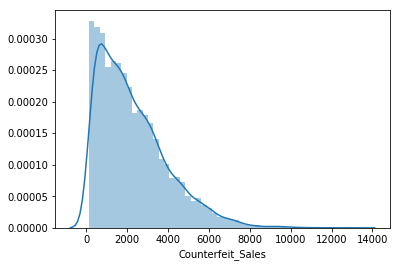

In [7]:
sns.distplot(train['Counterfeit_Sales'])


In [8]:
train["Counterfeit_Sales_l"] = np.log1p(train["Counterfeit_Sales"])

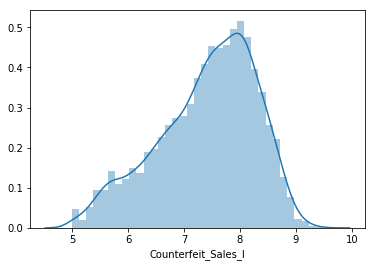

In [9]:
sns.distplot(train['Counterfeit_Sales_l'])

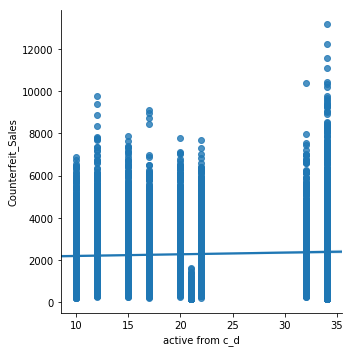

In [10]:
sns.lmplot(x='active from c_d',y='Counterfeit_Sales' , data=train)

In [11]:
train['active from c_d'].value_counts()


34    1166
12     760
22     749
32     749
15     748
20     739
17     736
10     729
21     442
Name: active from c_d, dtype: int64

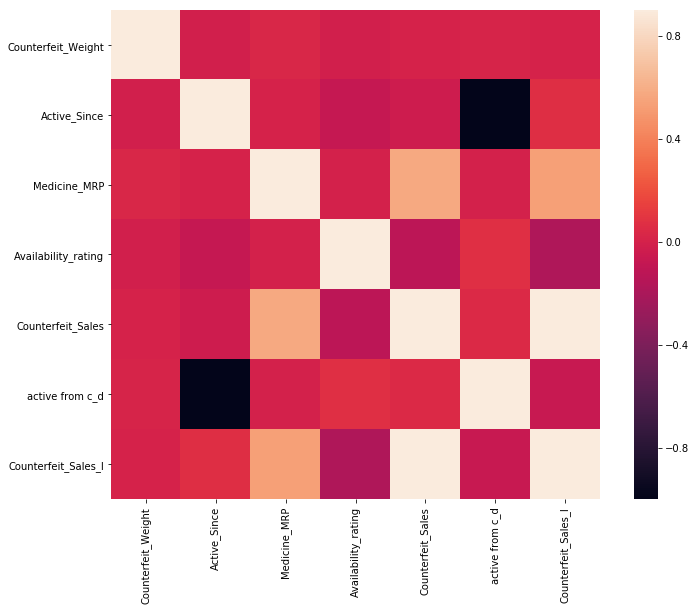

In [12]:
corrmat = train.corr()

plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [13]:
train.corr()


,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,active from c_d,Counterfeit_Sales_l
Counterfeit_Weight,1.000000,-0.016590,0.028523,-0.017632,0.005959,0.016590,0.002792
Active_Since,-0.016590,1.000000,0.002996,-0.075744,-0.039595,-1.000000,0.067068
Medicine_MRP,0.028523,0.002996,1.000000,-0.003216,0.573684,-0.002996,0.530097
Availability_rating,-0.017632,-0.075744,-0.003216,1.000000,-0.124058,0.075744,-0.181683
Counterfeit_Sales,0.005959,-0.039595,0.573684,-0.124058,1.000000,0.039595,0.895786
active from c_d,0.016590,-1.000000,-0.002996,0.075744,0.039595,1.000000,-0.067068
Counterfeit_Sales_l,0.002792,0.067068,0.530097,-0.181683,0.895786,-0.067068,1.000000


In [14]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
Counterfeit_Weight,17.101789


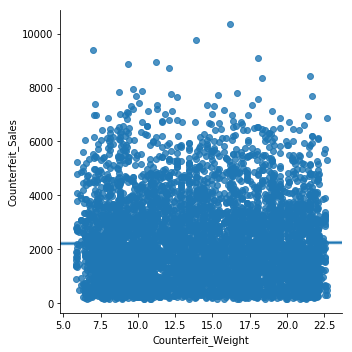

In [15]:
sns.lmplot(x='Counterfeit_Weight',y='Counterfeit_Sales' , data=train)

In [16]:
#I am dropping the counterfeit-weight as a dont find any  relation 
train=train.drop(['Counterfeit_Weight'],1)


In [17]:
train.head()

,Medicine_ID,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,active from c_d,Counterfeit_Sales_l
0,RRA15,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,22,7.482402
1,YVV26,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,34,8.029482
2,LJC15,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,22,7.864839
3,GWC40,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,22,7.005529
4,QMN13,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,34,5.074800


In [18]:
train=train.drop(['Active_Since'],1)

In [19]:
train.head()

,Medicine_ID,DistArea_ID,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,active from c_d,Counterfeit_Sales_l
0,RRA15,Area046,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,22,7.482402
1,YVV26,Area027,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,34,8.029482
2,LJC15,Area046,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,22,7.864839
3,GWC40,Area046,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,22,7.005529
4,QMN13,Area019,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,34,5.074800


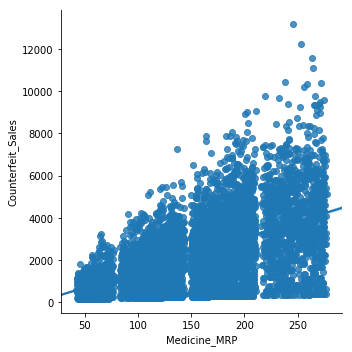

In [20]:
sns.lmplot(x='Medicine_MRP',y='Counterfeit_Sales' , data=train) # i ran the outlier code berlow then previewed it again.

In [21]:
train = train.drop(train[(train['Medicine_MRP']>150) & (train['Counterfeit_Sales']>12000)].index)


 mu = 2277.52 and sigma = 1684.00



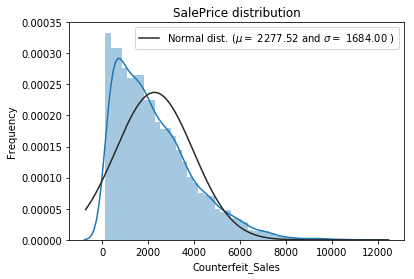

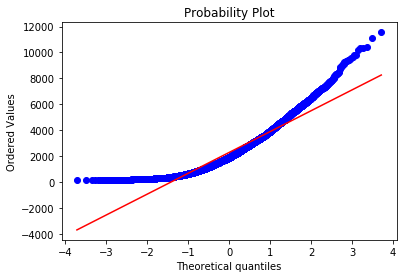

In [22]:
sns.distplot(train['Counterfeit_Sales'], fit =norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Counterfeit_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Counterfeit_Sales'], plot=plt)
plt.show()


 mu = 7.41 and sigma = 0.87



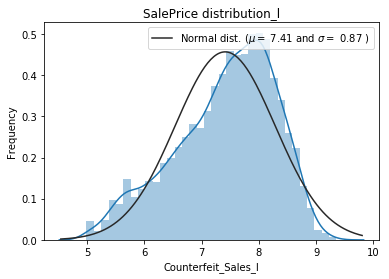

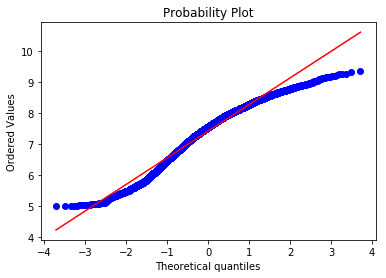

In [23]:
sns.distplot(train['Counterfeit_Sales_l'], fit =norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Counterfeit_Sales_l'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution_l')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Counterfeit_Sales_l'], plot=plt)
plt.show()

In [24]:
train.head()

,Medicine_ID,DistArea_ID,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,active from c_d,Counterfeit_Sales_l
0,RRA15,Area046,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,22,7.482402
1,YVV26,Area027,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,34,8.029482
2,LJC15,Area046,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,22,7.864839
3,GWC40,Area046,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,22,7.005529
4,QMN13,Area019,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,34,5.074800


In [25]:
train.DistArea_ID.value_counts()

Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    733
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64

In [26]:
train.Medicine_Type.value_counts()

Hreplacements         976
Antibiotics           969
Antiseptics           723
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [27]:
train.SidEffect_Level.value_counts()

mild        4433
critical    2383
Name: SidEffect_Level, dtype: int64

In [28]:
train.Area_Type.value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             733
Industrial             729
Name: Area_Type, dtype: int64

In [29]:
train.Area_City_Type.value_counts()

Tier 3    2653
Tier 2    2244
Tier 1    1919
Name: Area_City_Type, dtype: int64

In [30]:
train.Area_dist_level.value_counts()

Medium     2201
Unknown    1938
Small      1928
High        749
Name: Area_dist_level, dtype: int64

In [31]:
#sinse we have lot of data for dist area and 
from sklearn.preprocessing import LabelEncoder

for c in ['DistArea_ID', 'Medicine_Type']:
    lbl=LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))
    



In [32]:
train.shape

(6816, 12)

In [33]:
train.Medicine_Type.value_counts()

9     976
2     969
6     723
12    694
5     536
8     522
10    514
15    420
0     356
4     339
1     206
13    167
11    139
3     111
14     95
7      49
Name: Medicine_Type, dtype: int64

In [34]:
train['mild']=np.where(train['SidEffect_Level']=='mild',1,0)

In [35]:
train=train.drop(['SidEffect_Level'],1)

In [36]:
d1=pd.get_dummies(train['Area_Type'])
d1=d1.drop(['Industrial'],1)

In [37]:
train=pd.concat([train,d1],1)

In [38]:
d1=pd.get_dummies(train['Area_City_Type'],prefix='act')
d1.head()

,act_Tier 1,act_Tier 2,act_Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
d1=d1.drop(['act_Tier 1'],1)


In [40]:
train=pd.concat([train,d1],1)

In [41]:
#d1=pd.get_dummies(train['Area_dist_level'], prefix ='adl')

In [42]:
#d1.head()

In [43]:
#d1=d1.drop(['adl_High'],1)

In [44]:
#train=pd.concat([train,d1],1)

In [45]:
train.head()

,Medicine_ID,DistArea_ID,Medicine_MRP,Medicine_Type,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,active from c_d,Counterfeit_Sales_l,mild,CityLimits,DownTown,MidTownResidential,act_Tier 2,act_Tier 3
0,RRA15,8,160.2366,4,0.070422,DownTown,Tier 1,Small,1775.5026,22,7.482402,0,0,1,0,0,0
1,YVV26,5,110.4384,10,0.013000,CityLimits,Tier 3,Medium,3069.1520,34,8.029482,1,1,0,0,0,1
2,LJC15,8,259.4092,8,0.060783,DownTown,Tier 1,Small,2603.0920,22,7.864839,1,0,1,0,0,0
3,GWC40,8,99.9830,12,0.065555,DownTown,Tier 1,Small,1101.7130,22,7.005529,1,0,1,0,0,0
4,QMN13,4,56.4402,9,0.248859,MidTownResidential,Tier 1,Small,158.9402,34,5.074800,0,0,0,1,0,0


In [46]:
train=train.drop(['Area_Type','Area_dist_level','Area_City_Type'],1)

In [47]:
train.head()

,Medicine_ID,DistArea_ID,Medicine_MRP,Medicine_Type,Availability_rating,Counterfeit_Sales,active from c_d,Counterfeit_Sales_l,mild,CityLimits,DownTown,MidTownResidential,act_Tier 2,act_Tier 3
0,RRA15,8,160.2366,4,0.070422,1775.5026,22,7.482402,0,0,1,0,0,0
1,YVV26,5,110.4384,10,0.013000,3069.1520,34,8.029482,1,1,0,0,0,1
2,LJC15,8,259.4092,8,0.060783,2603.0920,22,7.864839,1,0,1,0,0,0
3,GWC40,8,99.9830,12,0.065555,1101.7130,22,7.005529,1,0,1,0,0,0
4,QMN13,4,56.4402,9,0.248859,158.9402,34,5.074800,0,0,0,1,0,0


In [48]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

In [49]:
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [50]:
skewed_feats

CityLimits             2.533628
MidTownResidential     2.225861
Availability_rating    1.160912
Counterfeit_Sales      1.136890
act_Tier 2             0.726806
act_Tier 3             0.454365
active from c_d        0.398869
Medicine_MRP           0.123629
Medicine_Type          0.049028
DistArea_ID           -0.054333
Counterfeit_Sales_l   -0.556796
mild                  -0.630729
DownTown              -0.663436
dtype: float64

In [51]:
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
CityLimits,2.533628
MidTownResidential,2.225861
Availability_rating,1.160912
Counterfeit_Sales,1.136890
act_Tier 2,0.726806
act_Tier 3,0.454365
active from c_d,0.398869
Medicine_MRP,0.123629
Medicine_Type,0.049028
DistArea_ID,-0.054333


In [52]:
train.head()

,Medicine_ID,DistArea_ID,Medicine_MRP,Medicine_Type,Availability_rating,Counterfeit_Sales,active from c_d,Counterfeit_Sales_l,mild,CityLimits,DownTown,MidTownResidential,act_Tier 2,act_Tier 3
0,RRA15,8,160.2366,4,0.070422,1775.5026,22,7.482402,0,0,1,0,0,0
1,YVV26,5,110.4384,10,0.013000,3069.1520,34,8.029482,1,1,0,0,0,1
2,LJC15,8,259.4092,8,0.060783,2603.0920,22,7.864839,1,0,1,0,0,0
3,GWC40,8,99.9830,12,0.065555,1101.7130,22,7.005529,1,0,1,0,0,0
4,QMN13,4,56.4402,9,0.248859,158.9402,34,5.074800,0,0,0,1,0,0


In [53]:
y_trainnl=train.Counterfeit_Sales.values
y_train = train.Counterfeit_Sales_l.values


In [54]:
train=train.drop(['Medicine_ID','Counterfeit_Sales','Counterfeit_Sales_l'],1)

In [55]:
#modelling part

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [56]:
#cross validatiuon func
n_folds=3
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [57]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

Elasticnet

In [58]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

Kernel Ridge Regression :

In [59]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [60]:
GBoost = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

Running the models now 

In [61]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))




Lasso score: 0.4714 (0.0010)



In [62]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4714 (0.0010)



In [63]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.4573 (0.0031)



In [64]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.4620 (0.0019)



In [65]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [66]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.4597 (0.0016)



stacked model 

In [67]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [68]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.4568 (0.0027)


In [69]:
# now predict part needs to be done  
test=pd.read_csv('counterfeit_test.csv')


In [70]:
train.head()

,DistArea_ID,Medicine_MRP,Medicine_Type,Availability_rating,active from c_d,mild,CityLimits,DownTown,MidTownResidential,act_Tier 2,act_Tier 3
0,8,160.2366,4,0.070422,22,0,0,1,0,0,0
1,5,110.4384,10,0.013000,34,1,1,0,0,0,1
2,8,259.4092,8,0.060783,22,1,0,1,0,0,0
3,8,99.9830,12,0.065555,22,1,0,1,0,0,0
4,4,56.4402,9,0.248859,34,0,0,0,1,0,0


In [71]:
testid=pd.DataFrame(test['Medicine_ID'])

In [72]:
#meancf=train['Counterfeit_Weight'].mean()

In [73]:
#train['Counterfeit_Weight']=train['Counterfeit_Weight'].fillna(train['Counterfeit_Weight'].mean())

In [74]:
test=test.drop(['Counterfeit_Weight','Medicine_ID'],1)

In [75]:
test['active from c_d']= test['Active_Since'].apply(lambda x: now.year-x)

In [76]:
test=test.drop(['Active_Since'],1)

In [77]:
for c in ['DistArea_ID', 'Medicine_Type']:
    lbl=LabelEncoder()
    lbl.fit(list(test[c].values))
    test[c] = lbl.transform(list(test[c].values))

In [78]:
test['mild']=np.where(test['SidEffect_Level']=='mild',1,0)

In [79]:
test=test.drop(['SidEffect_Level'],1)

In [80]:
d1=pd.get_dummies(test['Area_Type'])
d1=d1.drop(['Industrial'],1)
test=pd.concat([test,d1],1)

In [81]:
d1=pd.get_dummies(test['Area_City_Type'],prefix='act')
d1=d1.drop(['act_Tier 1'],1)
test=pd.concat([test,d1],1)


In [82]:
test=test.drop(['Area_Type','Area_dist_level','Area_City_Type'],1)


In [83]:
test.head()

,DistArea_ID,Medicine_MRP,Medicine_Type,Availability_rating,active from c_d,mild,CityLimits,DownTown,MidTownResidential,act_Tier 2,act_Tier 3
0,5,85.5328,2,0.112747,34,1,1,0,0,0,1
1,7,257.1460,12,0.144446,17,1,0,1,0,1,0
2,7,98.1172,5,0.144221,17,1,0,1,0,1,0
3,0,135.3730,15,0.100388,21,1,0,0,1,0,1
4,4,112.8016,12,0.022585,34,1,0,0,1,0,0


In [84]:
train.head()

,DistArea_ID,Medicine_MRP,Medicine_Type,Availability_rating,active from c_d,mild,CityLimits,DownTown,MidTownResidential,act_Tier 2,act_Tier 3
0,8,160.2366,4,0.070422,22,0,0,1,0,0,0
1,5,110.4384,10,0.013000,34,1,1,0,0,0,1
2,8,259.4092,8,0.060783,22,1,0,1,0,0,0
3,8,99.9830,12,0.065555,22,1,0,1,0,0,0
4,4,56.4402,9,0.248859,34,0,0,0,1,0,0


In [85]:
stacked_averaged_models.fit(train.values, y_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

In [86]:
stacked_pred

array([ 2085.9839857 ,  3454.36874536,  1303.67335007, ...,  2696.5297943 ,
        3361.41629487,  3479.81840068])